In this notebook, we need to do the following:
- Define the number of check in stations and voting booths in each precinct. This should be easy, just finding a cutoff for small or big precincts.
- Identify precincts by populace of disenfranchised voters. Need to see if this will create several clusters, or just a binary split.

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [19]:
data = pd.read_csv('2026_predictions.csv')
data.sample(6)

,total,race_percent_white,race_percent_black,race_percent_native,race_percent_asian,race_percent_pacific_islander,race_percent_hispanic,race_percent_other,income_percent_below_15K,income_percent_15K_35K,...,female_percent,disability_percent,male_disability_percent,female_disability_percent,district,year,is_midterm,lagged_turnout,lagged_percentage_turnout,ballots_cast
691,3083.534380,0.293793,0.523425,0.000000e+00,9.658246e-02,0.000000,0.030836,0.000000,0.328201,0.224791,...,0.480832,0.093597,0.019085,0.074511,PITTSBURGH WARD 3 DIST 1,2026,1,148,62.45,101
865,6716.353446,0.857552,0.069235,0.000000e+00,4.161746e-02,0.000000,0.000000,0.004022,0.123477,0.147959,...,0.544166,0.142590,0.055360,0.087230,ROSS WARD 4 DIST 2,2026,1,915,84.02,788
188,3341.202971,0.837164,0.027502,1.322144e-07,5.022195e-02,0.000005,0.013723,0.003580,0.208739,0.333101,...,0.466434,0.224354,0.116343,0.108011,ETNA WARD 2,2026,1,488,70.93,408
365,3343.414913,0.656797,0.113512,1.373188e-03,1.754916e-01,0.000000,0.000000,0.015287,0.170308,0.161435,...,0.486014,0.130240,0.060546,0.069694,MONROEVILLE WARD 2 DIST 3,2026,1,896,81.90,752
203,3012.071388,0.894334,0.002153,0.000000e+00,1.334625e-08,0.000000,0.024531,0.000000,0.189754,0.169337,...,0.506309,0.304045,0.192159,0.111885,FORWARD DIST 1,2026,1,315,84.22,255
755,2205.303907,0.851051,0.093222,6.374635e-06,4.460411e-02,0.000000,0.000000,0.034979,0.000000,0.096379,...,0.489107,0.150504,0.106469,0.044035,PITTSBURGH WARD 6 DIST 3,2026,1,536,70.16,491


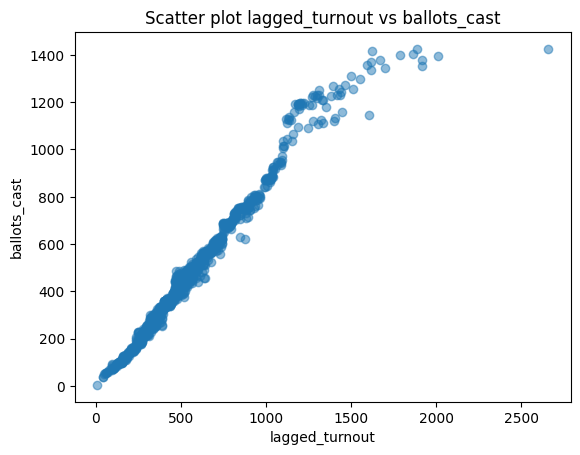

In [20]:
# Plot lagged_turnout vs ballots_cast

import matplotlib.pyplot as plt
plt.scatter(data.lagged_turnout, data.ballots_cast, alpha=0.5)
plt.title('Scatter plot lagged_turnout vs ballots_cast')
plt.xlabel('lagged_turnout')
plt.ylabel('ballots_cast')
plt.show()

Based on the trends, we can differentiate between precincts with 1200+ voters last year and those with less.

In [21]:
data['check_in_stations'] = 1
data['voting_booths'] = ((data['lagged_turnout'] > 1200).astype(int) + 1) * 3

In [22]:
data

,total,race_percent_white,race_percent_black,race_percent_native,race_percent_asian,race_percent_pacific_islander,race_percent_hispanic,race_percent_other,income_percent_below_15K,income_percent_15K_35K,...,male_disability_percent,female_disability_percent,district,year,is_midterm,lagged_turnout,lagged_percentage_turnout,ballots_cast,check_in_stations,voting_booths
0,3587.021486,0.924896,0.003024,5.720420e-03,0.010605,0.000000e+00,0.028436,0.004876,0.146698,0.227556,...,0.089035,0.120178,ALEPPO,2026,1,1128,82.76,1127,1,3
1,2819.197463,0.741135,0.065131,1.319492e-07,0.182826,0.000000e+00,0.004830,0.002541,0.056678,0.066834,...,0.015977,0.084043,ASPINWALL DIST 1,2026,1,730,85.38,629,1,3
2,2830.095799,0.743008,0.065388,0.000000e+00,0.182487,0.000000e+00,0.004958,0.002505,0.057540,0.067789,...,0.016164,0.084126,ASPINWALL DIST 2,2026,1,472,81.10,427,1,3
3,2831.447923,0.743035,0.065403,0.000000e+00,0.182351,0.000000e+00,0.004980,0.002494,0.057671,0.067945,...,0.016192,0.084114,ASPINWALL DIST 3,2026,1,698,84.40,618,1,3
4,2203.983574,0.713338,0.229701,2.699011e-03,0.003748,0.000000e+00,0.026200,0.009296,0.178168,0.297448,...,0.151556,0.083438,AVALON WARD 1,2026,1,849,76.14,707,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1480.000000,0.222341,0.710557,0.000000e+00,0.000000,1.000000e-03,0.092573,0.020546,0.423703,0.165827,...,0.065541,0.220946,PITTSBURGH WARD 12 DIST 2,2026,1,153,50.50,99,1,3
1128,1809.711974,0.093957,0.840640,0.000000e+00,0.000000,8.728051e-07,0.000000,0.099325,0.031905,0.607462,...,0.000000,0.185119,PITTSBURGH WARD 12 DIST 9,2026,1,138,48.25,97,1,3
1129,3307.068654,0.374426,0.344919,4.739217e-03,0.021817,0.000000e+00,0.000000,0.000012,0.146051,0.083124,...,0.132123,0.044753,PITTSBURGH WARD 21 DIST 3,2026,1,402,66.12,336,1,3
1130,3469.000000,0.685764,0.240840,2.710061e-02,0.000000,0.000000e+00,0.000799,0.029101,0.139538,0.159396,...,0.084462,0.043240,PITTSBURGH WARD 22 DIST 2,2026,1,487,72.58,428,1,3


For n_clusters = 3 The average silhouette_score is : 0.37299170873740645
For n_clusters = 4 The average silhouette_score is : 0.22295064589444755
For n_clusters = 5 The average silhouette_score is : 0.23439509852917081
For n_clusters = 6 The average silhouette_score is : 0.17046282125313478
For n_clusters = 7 The average silhouette_score is : 0.16816288098671003
For n_clusters = 8 The average silhouette_score is : 0.16184638496267237
For n_clusters = 9 The average silhouette_score is : 0.1657837215024761
For n_clusters = 10 The average silhouette_score is : 0.1627486006038588
For n_clusters = 11 The average silhouette_score is : 0.1668805666560982
For n_clusters = 12 The average silhouette_score is : 0.15699017724109535
For n_clusters = 13 The average silhouette_score is : 0.15451858915724206
For n_clusters = 14 The average silhouette_score is : 0.1510191734717253


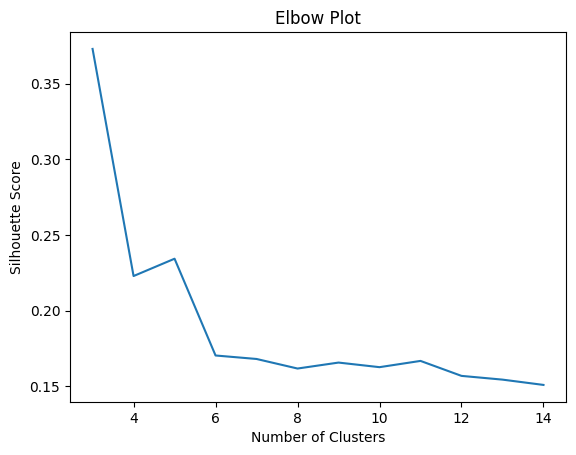

In [24]:
demo_data = data[['race_percent_white', 'race_percent_black',
       'race_percent_native', 'race_percent_asian',
       'race_percent_pacific_islander', 'race_percent_hispanic',
       'race_percent_other', 'income_percent_below_15K',
       'income_percent_15K_35K', 'income_percent_35K_65K',
       'income_percent_above_65K', 'male_percent', 'female_percent',
       'disability_percent', 'male_disability_percent',
       'female_disability_percent']]


# Elbow Plot
range_n_clusters = range(3, 15)
scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(demo_data)
    silhouette_avg = silhouette_score(demo_data, cluster_labels)
    scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot')
plt.show()


In [25]:
best_cluster = 6

clusterer = KMeans(n_clusters=best_cluster, random_state=10)
cluster_labels = clusterer.fit_predict(demo_data)

data['cluster'] = cluster_labels

In [28]:
for i in range(best_cluster):
    print('Cluster', i, 'has:', len(data[data['cluster'] == i]), 'precincts')


Cluster 0 has: 325 precincts
Cluster 1 has: 90 precincts
Cluster 2 has: 145 precincts
Cluster 3 has: 231 precincts
Cluster 4 has: 167 precincts
Cluster 5 has: 174 precincts


In [ ]:
display(data[data['cluster'] == 0].describe())
display(data[data['cluster'] == 0].sample(5))

print('Cluster 0')

,total,race_percent_white,race_percent_black,race_percent_native,race_percent_asian,race_percent_pacific_islander,race_percent_hispanic,race_percent_other,income_percent_below_15K,income_percent_15K_35K,income_percent_35K_65K,income_percent_above_65K,male_percent,female_percent,disability_percent,male_disability_percent,female_disability_percent,year,is_midterm,lagged_turnout,lagged_percentage_turnout,ballots_cast,check_in_stations,voting_booths,cluster
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.0,325.0,325.000000,325.000000,325.000000,325.0,325.000000,325.0
mean,4155.994876,0.892467,0.028514,0.000973,0.023570,0.000907,0.009374,0.007937,0.117233,0.175098,0.264916,0.373864,0.492973,0.506360,0.123344,0.056233,0.067332,2026.0,1.0,726.772308,82.341692,632.470769,1.0,3.286154,0.0
std,1881.957168,0.054568,0.030696,0.002641,0.026195,0.004086,0.012364,0.017075,0.053593,0.052091,0.056673,0.046757,0.051367,0.050636,0.047147,0.029649,0.031745,0.0,0.0,349.442153,5.577758,282.618625,0.0,0.882595,0.0
min,757.557715,0.726642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046577,0.121152,0.269425,0.314809,0.320312,0.005422,0.000000,0.000000,2026.0,1.0,57.000000,57.460000,55.000000,1.0,3.000000,0.0
25%,2822.351587,0.860457,0.003372,0.000000,0.003187,0.000000,0.000000,0.000000,0.087422,0.147590,0.222937,0.347388,0.459957,0.474745,0.094549,0.037352,0.047851,2026.0,1.0,507.000000,80.360000,462.000000,1.0,3.000000,0.0
50%,3881.720046,0.909611,0.020659,0.000000,0.015238,0.000000,0.004894,0.002829,0.106498,0.164771,0.257935,0.371472,0.494207,0.505779,0.117920,0.053470,0.065630,2026.0,1.0,635.000000,83.870000,555.000000,1.0,3.000000,0.0
75%,5311.585993,0.930815,0.040664,0.000549,0.035411,0.000000,0.012394,0.008747,0.148821,0.206874,0.301761,0.405576,0.525255,0.539831,0.157362,0.078631,0.085575,2026.0,1.0,863.000000,86.050000,752.000000,1.0,3.000000,0.0
max,13579.537275,0.994362,0.126459,0.020797,0.122335,0.027387,0.052280,0.106735,0.356228,0.329853,0.441694,0.499411,0.679688,0.685191,0.227083,0.147755,0.164085,2026.0,1.0,2656.000000,95.000000,1425.000000,1.0,6.000000,0.0


,total,race_percent_white,race_percent_black,race_percent_native,race_percent_asian,race_percent_pacific_islander,race_percent_hispanic,race_percent_other,income_percent_below_15K,income_percent_15K_35K,income_percent_35K_65K,income_percent_above_65K,male_percent,female_percent,disability_percent,male_disability_percent,female_disability_percent,district,year,is_midterm,lagged_turnout,lagged_percentage_turnout,ballots_cast,check_in_stations,voting_booths,cluster
311,3592.875608,0.941141,0.003616,0.000000e+00,0.018952,0.0,0.002589,0.000000,0.101324,0.168387,0.222937,0.447170,0.501080,0.498920,0.107464,0.022347,0.085117,MCCANDLESS WARD 4 DIST 3,2026,1,681,87.76,590,1,3,0
460,7022.585020,0.765708,0.039194,0.000000e+00,0.051834,0.0,0.000000,0.005171,0.125394,0.112860,0.270214,0.398480,0.463292,0.536708,0.078428,0.022849,0.055579,N FAYETTE DIST 3,2026,1,1914,78.19,1351,1,6,0
796,3262.852644,0.932639,0.029535,3.905512e-07,0.021331,0.0,0.001660,0.000074,0.086564,0.162432,0.317521,0.346896,0.429417,0.570583,0.115154,0.017363,0.097791,PLEASANT HL DIST 2,2026,1,478,82.70,432,1,3,0
153,1785.181763,0.877510,0.006327,5.373067e-06,0.015234,0.0,0.052280,0.000026,0.096039,0.159583,0.310347,0.436473,0.592381,0.407619,0.033593,0.004810,0.028783,DORMONT DIST 7,2026,1,425,81.57,366,1,3,0
899,2820.129285,0.953470,0.000000,2.904226e-07,0.034360,0.0,0.000000,0.000005,0.038959,0.256686,0.396256,0.316556,0.459957,0.540043,0.117598,0.009500,0.108098,SCOTT WARD 1 DIST 1,2026,1,420,71.55,373,1,3,0
